# Lab 4 - Radiation With Geiger Counters

In this lab we used a geiger counter to measure the background radiation in the lab, and then used a radiation source which in this case was a saltshaker painted with some sort of radioactive material, possibly uranium. We took measurements at 5cm intervals from 10-40cm. Finally Our last dataset was recorded by placing a piece of tinfoil between the source and the geiger counter and folding the tinfoil repeatedly to create a thicker and thicker barrier, allowing us to measure the attenuation. We then look in the lab analysis below at data analysis with the poisson distribution, gaussian distribution, and linearization. 

Reading in using pandas 

In [26]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import poisson
from scipy import stats as sc
from tabulate import tabulate as tab
from scipy.stats import linregress
from tabulate import tabulate as tab

In [27]:
Data = pd.ExcelFile('Radiation Data.xlsx')
Data.sheet_names

['Sheet1',
 'Back',
 '10cm',
 '15cm',
 '20cm',
 '25cm',
 '30cm',
 '35cm',
 '40cm',
 '10cm-1fold',
 '2folds',
 '3folds',
 '4folds',
 '5folds',
 '6folds']

In [28]:
Back = pd.read_excel(Data, sheet_name = 'Back').values
tencm = pd.read_excel(Data, sheet_name = '10cm').values
fifteencm = pd.read_excel(Data, sheet_name = '15cm').values
twentycm = pd.read_excel(Data, sheet_name = '20cm').values
twentyfivecm = pd.read_excel(Data, sheet_name = '25cm').values
thirtycm = pd.read_excel(Data, sheet_name = '30cm').values
thirtyfivecm = pd.read_excel(Data, sheet_name = '35cm').values
fortycm = pd.read_excel(Data, sheet_name = '40cm').values
onefold = pd.read_excel(Data, sheet_name = '10cm-1fold').values
twofold = pd.read_excel(Data, sheet_name = '2folds').values
threefold = pd.read_excel(Data, sheet_name = '3folds').values
fourfold = pd.read_excel(Data, sheet_name = '4folds').values
fivefold = pd.read_excel(Data, sheet_name = '5folds').values
sixfold = pd.read_excel(Data, sheet_name = '6folds').values

In [4]:
timeint = [Back[1,0],Back[2,0],Back[3,0],Back[4,0],Back[5,0],Back[6,0],Back[7,0],Back[8,0],Back[9,0],Back[10,0],Back[11,0],Back[12,0],Back[13,0],Back[14,0],Back[15,0],Back[16,0],Back[17,0],Back[18,0],Back[19,0],Back[20,0],Back[21,0],Back[22,0],Back[23,0],Back[24,0],Back[25,0],Back[26,0],Back[27,0],Back[28,0],Back[29,0],Back[30,0]  ]


BackCount = [Back[1,1],Back[2,1],Back[3,1],Back[4,1],Back[5,1],Back[6,1],Back[7,1],Back[8,1],Back[9,1],Back[10,1],Back[11,1],Back[12,1],Back[13,1],Back[14,1],Back[15,1],Back[16,1],Back[17,1],Back[18,1],Back[19,1],Back[20,1],Back[21,1],Back[22,1],Back[23,1],Back[24,1],Back[25,1],Back[26,1],Back[27,1],Back[28,1],Back[29,1],Back[30,1]  ]
tencmcount = [tencm[1,1],tencm[2,1],tencm[3,1],tencm[4,1],tencm[5,1],tencm[6,1],tencm[7,1],tencm[8,1],tencm[9,1],tencm[10,1],tencm[11,1],tencm[12,1],tencm[13,1],tencm[14,1],tencm[15,1],tencm[16,1],tencm[17,1],tencm[18,1],tencm[19,1],tencm[20,1],tencm[21,1],tencm[22,1],tencm[23,1],tencm[24,1],tencm[25,1],tencm[26,1],tencm[27,1],tencm[28,1],tencm[29,1],tencm[30,1]  ]
fifteencmcount = [fifteencm[1,1],fifteencm[2,1],fifteencm[3,1],fifteencm[4,1],fifteencm[5,1],fifteencm[6,1],fifteencm[7,1],fifteencm[8,1],fifteencm[9,1],fifteencm[10,1],fifteencm[11,1],fifteencm[12,1],fifteencm[13,1],fifteencm[14,1],fifteencm[15,1],fifteencm[16,1],fifteencm[17,1],fifteencm[18,1],fifteencm[19,1],fifteencm[20,1],fifteencm[21,1],fifteencm[22,1],fifteencm[23,1],fifteencm[24,1],fifteencm[25,1],fifteencm[26,1],fifteencm[27,1],fifteencm[28,1],fifteencm[29,1],fifteencm[30,1]  ]
twentycmcount = [twentycm[1,1],twentycm[2,1],twentycm[3,1],twentycm[4,1],twentycm[5,1],twentycm[6,1],twentycm[7,1],twentycm[8,1],twentycm[9,1],twentycm[10,1],twentycm[11,1],twentycm[12,1],twentycm[13,1],twentycm[14,1],twentycm[15,1],twentycm[16,1],twentycm[17,1],twentycm[18,1],twentycm[19,1],twentycm[20,1],twentycm[21,1],twentycm[22,1],twentycm[23,1],twentycm[24,1],twentycm[25,1],twentycm[26,1],twentycm[27,1],twentycm[28,1],twentycm[29,1],twentycm[30,1]  ]
twentyfivecmcount = [twentyfivecm[1,1],twentyfivecm[2,1],twentyfivecm[3,1],twentyfivecm[4,1],twentyfivecm[5,1],twentyfivecm[6,1],twentyfivecm[7,1],twentyfivecm[8,1],twentyfivecm[9,1],twentyfivecm[10,1],twentyfivecm[11,1],twentyfivecm[12,1],twentyfivecm[13,1],twentyfivecm[14,1],twentyfivecm[15,1],twentyfivecm[16,1],twentyfivecm[17,1],twentyfivecm[18,1],twentyfivecm[19,1],twentyfivecm[20,1],twentyfivecm[21,1],twentyfivecm[22,1],twentyfivecm[23,1],twentyfivecm[24,1],twentyfivecm[25,1],twentyfivecm[26,1],twentyfivecm[27,1],twentyfivecm[28,1],twentyfivecm[29,1],twentyfivecm[30,1]  ]
thirtycmcount = [thirtycm[1,1],thirtycm[2,1],thirtycm[3,1],thirtycm[4,1],thirtycm[5,1],thirtycm[6,1],thirtycm[7,1],thirtycm[8,1],thirtycm[9,1],thirtycm[10,1],thirtycm[11,1],thirtycm[12,1],thirtycm[13,1],thirtycm[14,1],thirtycm[15,1],thirtycm[16,1],thirtycm[17,1],thirtycm[18,1],thirtycm[19,1],thirtycm[20,1],thirtycm[21,1],thirtycm[22,1],thirtycm[23,1],thirtycm[24,1],thirtycm[25,1],thirtycm[26,1],thirtycm[27,1],thirtycm[28,1],thirtycm[29,1],thirtycm[30,1]  ]
thirtyfivecmcount = [thirtyfivecm[1,1],thirtyfivecm[2,1],thirtyfivecm[3,1],thirtyfivecm[4,1],thirtyfivecm[5,1],thirtyfivecm[6,1],thirtyfivecm[7,1],thirtyfivecm[8,1],thirtyfivecm[9,1],thirtyfivecm[10,1],thirtyfivecm[11,1],thirtyfivecm[12,1],thirtyfivecm[13,1],thirtyfivecm[14,1],thirtyfivecm[15,1],thirtyfivecm[16,1],thirtyfivecm[17,1],thirtyfivecm[18,1],thirtyfivecm[19,1],thirtyfivecm[20,1],thirtyfivecm[21,1],thirtyfivecm[22,1],thirtyfivecm[23,1],thirtyfivecm[24,1],thirtyfivecm[25,1],thirtyfivecm[26,1],thirtyfivecm[27,1],thirtyfivecm[28,1],thirtyfivecm[29,1],thirtyfivecm[30,1]  ]
fortycmcount = [fortycm[1,1],fortycm[2,1],fortycm[3,1],fortycm[4,1],fortycm[5,1],fortycm[6,1],fortycm[7,1],fortycm[8,1],fortycm[9,1],fortycm[10,1],fortycm[11,1],fortycm[12,1],fortycm[13,1],fortycm[14,1],fortycm[15,1],fortycm[16,1],fortycm[17,1],fortycm[18,1],fortycm[19,1],fortycm[20,1],fortycm[21,1],fortycm[22,1],fortycm[23,1],fortycm[24,1],fortycm[25,1],fortycm[26,1],fortycm[27,1],fortycm[28,1],fortycm[29,1],fortycm[30,1]  ]
onefoldcount = [onefold[1,1],onefold[2,1],onefold[3,1],onefold[4,1],onefold[5,1],onefold[6,1],onefold[7,1],onefold[8,1],onefold[9,1],onefold[10,1],onefold[11,1],onefold[12,1],onefold[13,1],onefold[14,1],onefold[15,1],onefold[16,1],onefold[17,1],onefold[18,1],onefold[19,1],onefold[20,1],onefold[21,1],onefold[22,1],onefold[23,1],onefold[24,1],onefold[25,1],onefold[26,1],onefold[27,1],onefold[28,1],onefold[29,1],onefold[30,1]  ]
twofoldcount = [twofold[1,1],twofold[2,1],twofold[3,1],twofold[4,1],twofold[5,1],twofold[6,1],twofold[7,1],twofold[8,1],twofold[9,1],twofold[10,1],twofold[11,1],twofold[12,1],twofold[13,1],twofold[14,1],twofold[15,1],twofold[16,1],twofold[17,1],twofold[18,1],twofold[19,1],twofold[20,1],twofold[21,1],twofold[22,1],twofold[23,1],twofold[24,1],twofold[25,1],twofold[26,1],twofold[27,1],twofold[28,1],twofold[29,1],twofold[30,1]  ]
threefoldcount = [threefold[1,1],threefold[2,1],threefold[3,1],threefold[4,1],threefold[5,1],threefold[6,1],threefold[7,1],threefold[8,1],threefold[9,1],threefold[10,1],threefold[11,1],threefold[12,1],threefold[13,1],threefold[14,1],threefold[15,1],threefold[16,1],threefold[17,1],threefold[18,1],threefold[19,1],threefold[20,1],threefold[21,1],threefold[22,1],threefold[23,1],threefold[24,1],threefold[25,1],threefold[26,1],threefold[27,1],threefold[28,1],threefold[29,1],threefold[30,1]  ]
fourfoldcount = [fourfold[1,1],fourfold[2,1],fourfold[3,1],fourfold[4,1],fourfold[5,1],fourfold[6,1],fourfold[7,1],fourfold[8,1],fourfold[9,1],fourfold[10,1],fourfold[11,1],fourfold[12,1],fourfold[13,1],fourfold[14,1],fourfold[15,1],fourfold[16,1],fourfold[17,1],fourfold[18,1],fourfold[19,1],fourfold[20,1],fourfold[21,1],fourfold[22,1],fourfold[23,1],fourfold[24,1],fourfold[25,1],fourfold[26,1],fourfold[27,1],fourfold[28,1],fourfold[29,1],fourfold[30,1]  ]
fivefoldcount = [fivefold[1,1],fivefold[2,1],fivefold[3,1],fivefold[4,1],fivefold[5,1],fivefold[6,1],fivefold[7,1],fivefold[8,1],fivefold[9,1],fivefold[10,1],fivefold[11,1],fivefold[12,1],fivefold[13,1],fivefold[14,1],fivefold[15,1],fivefold[16,1],fivefold[17,1],fivefold[18,1],fivefold[19,1],fivefold[20,1],fivefold[21,1],fivefold[22,1],fivefold[23,1],fivefold[24,1],fivefold[25,1],fivefold[26,1],fivefold[27,1],fivefold[28,1],fivefold[29,1],fivefold[30,1]  ]
sixfoldcount = [sixfold[1,1],sixfold[2,1],sixfold[3,1],sixfold[4,1],sixfold[5,1],sixfold[6,1],sixfold[7,1],sixfold[8,1],sixfold[9,1],sixfold[10,1],sixfold[11,1],sixfold[12,1],sixfold[13,1],sixfold[14,1],sixfold[15,1],sixfold[16,1],sixfold[17,1],sixfold[18,1],sixfold[19,1],sixfold[20,1],sixfold[21,1],sixfold[22,1],sixfold[23,1],sixfold[24,1],sixfold[25,1],sixfold[26,1],sixfold[27,1],sixfold[28,1],sixfold[29,1],sixfold[30,1]  ]



# 4.3 Poisson Statistics

I then plotted histograms for each dataset to attempt to see the poisson distribution available.

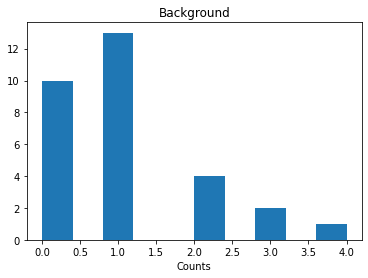

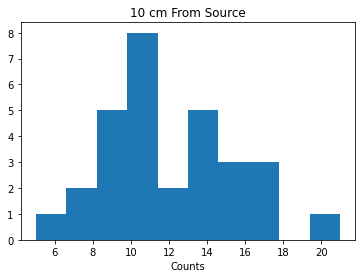

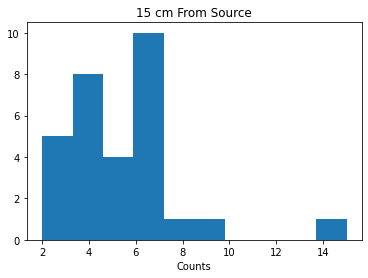

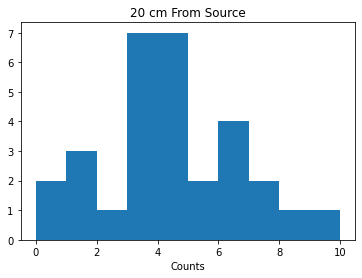

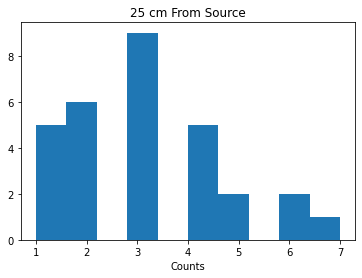

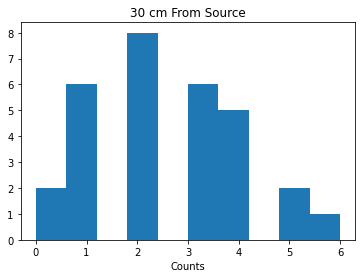

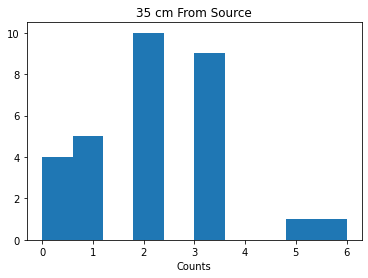

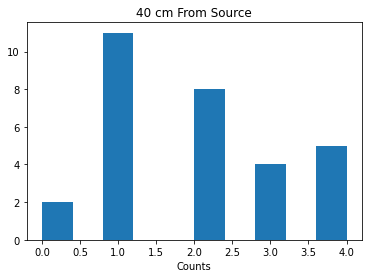

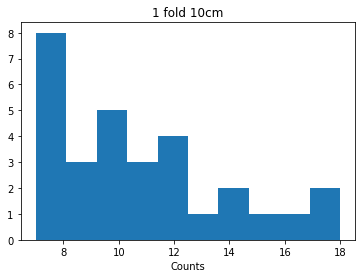

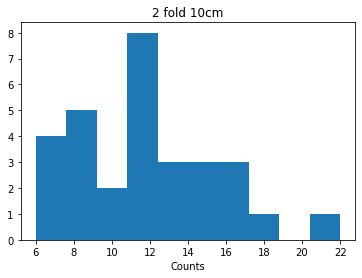

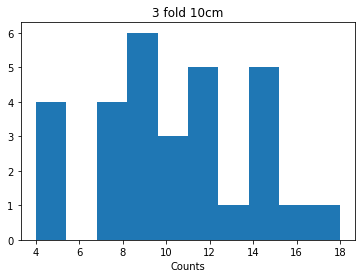

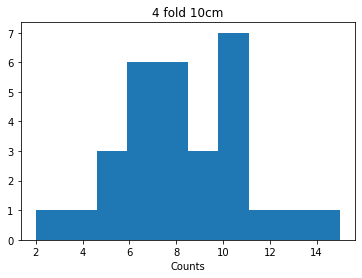

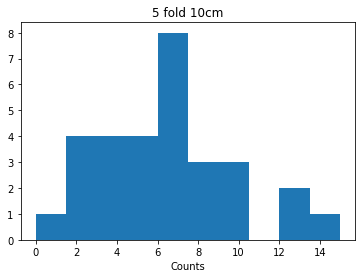

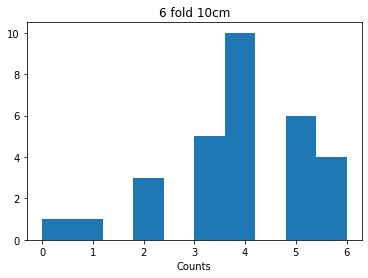

In [5]:
plt.figure()
plt.hist(BackCount)
plt.xlabel('Counts')
plt.title('Background')
plt.show()

plt.figure()
plt.hist(tencmcount)
plt.xlabel('Counts')
plt.title('10 cm From Source')
plt.show()

plt.figure()
plt.hist(fifteencmcount)
plt.title('15 cm From Source')
plt.xlabel('Counts')
plt.show()

plt.figure()
plt.hist(twentycmcount)
plt.title('20 cm From Source')
plt.xlabel('Counts')
plt.show()

plt.figure()
plt.hist(twentyfivecmcount)
plt.xlabel('Counts')
plt.title('25 cm From Source')
plt.show()

plt.figure()
plt.hist(thirtycmcount)
plt.xlabel('Counts')
plt.title('30 cm From Source')
plt.show()

plt.figure()
plt.hist(thirtyfivecmcount)
plt.xlabel('Counts')
plt.title('35 cm From Source')
plt.show()

plt.figure()
plt.hist(fortycmcount)
plt.xlabel('Counts')
plt.title('40 cm From Source')
plt.show()

plt.figure()
plt.hist(onefoldcount)
plt.xlabel('Counts')
plt.title('1 fold 10cm')
plt.show()

plt.figure()
plt.hist(twofoldcount)
plt.xlabel('Counts')
plt.title('2 fold 10cm')
plt.show()

plt.figure()
plt.hist(threefoldcount)
plt.xlabel('Counts')
plt.title('3 fold 10cm')
plt.show()

plt.figure()
plt.hist(fourfoldcount)
plt.xlabel('Counts')
plt.title('4 fold 10cm')
plt.show()

plt.figure()
plt.hist(fivefoldcount)
plt.xlabel('Counts')
plt.title('5 fold 10cm')
plt.show()

plt.figure()
plt.hist(sixfoldcount)
plt.xlabel('Counts')
plt.title('6 fold 10cm')
plt.show()

Now that we have loaded our data into the notebook-admittedly in a bit of a slow way, we can find the mean counts per time interval, which for my group was 5 seconds and then using that mean find the standard deviation using both the square root rule for counting statistics as well as the actual standard deviation in the dataset. 

In [6]:
def mean(Data):
    mean = np.mean(Data)
    return mean


In [7]:
meanBack = mean(BackCount)
mean10cm = mean(tencmcount)
mean15cm = mean(fifteencmcount)
mean20cm = mean(twentycmcount)
mean25cm = mean(twentyfivecmcount)
mean30cm = mean(thirtycmcount)
mean35cm = mean(thirtyfivecmcount)
mean40cm = mean(fortycmcount)
mean1fold = mean(onefoldcount)
mean2fold = mean(twofoldcount)
mean3fold = mean(threefoldcount)
mean4fold = mean(fourfoldcount)
mean5fold = mean(fivefoldcount)
mean6fold = mean(sixfoldcount)

Now we can find the standard deviation by both squareroot rule and numpy built in function to compare.

In [8]:
stdBack = np.std(BackCount)
std10cm = np.std(tencmcount)
std15cm = np.std(fifteencmcount)
std20cm = np.std(twentycmcount)
std25cm = np.std(twentyfivecmcount)
std30cm = np.std(thirtycmcount)
std35cm = np.std(thirtyfivecmcount)
std40cm = np.std(fortycmcount)

std1fold = np.std(onefoldcount)
std2fold = np.std(twofoldcount)
std3fold = np.std(threefoldcount)
std4fold = np.std(fourfoldcount)
std5fold = np.std(fivefoldcount)
std6fold = np.std(sixfoldcount)

Now to use the means that we calculatre two cells above to find the standard deviation by the square root rule and compare to the gaussian numpy standard deviation.

In [9]:
sqrtBack = np.sqrt(meanBack)
sqrt10cm = np.sqrt(mean10cm)
sqrt15cm = np.sqrt(mean15cm)
sqrt20cm = np.sqrt(mean20cm)
sqrt25cm = np.sqrt(mean25cm)
sqrt30cm = np.sqrt(mean30cm)
sqrt35cm = np.sqrt(mean35cm)
sqrt40cm = np.sqrt(mean40cm)

sqrt1fold = np.sqrt(mean1fold)
sqrt2fold = np.sqrt(mean2fold)
sqrt3fold = np.sqrt(mean3fold)
sqrt4fold = np.sqrt(mean4fold)
sqrt5fold = np.sqrt(mean5fold)
sqrt6fold = np.sqrt(mean6fold)


Table = [["Dataset", "Mean Counts", "Standard Deviation", "Square Root Rule"],
        ["Background", meanBack, stdBack, sqrtBack],
        ["10cm Away", mean10cm, std10cm, sqrt10cm],
        ["15cm Away",mean15cm, std15cm, sqrt15cm],
        ["20 cm Away", mean20cm, std20cm, sqrt20cm],
        ["25cm Away",mean25cm, std25cm, sqrt25cm],
        ["30cm Away",mean30cm, std30cm, sqrt30cm],
        ["35cm Away", mean35cm, std35cm, sqrt35cm],
        ["40cm Away", mean40cm, std40cm, sqrt40cm],
        ["1 Fold", mean1fold, std1fold, sqrt1fold],
        ["2 Fold", mean2fold, std2fold, sqrt2fold],
        ["3 Fold", mean3fold, std3fold, sqrt3fold],
        ["4 Fold", mean4fold, std4fold, sqrt4fold],
        ["5 Fold", mean5fold, std5fold, sqrt5fold],
        ["6 Fold", mean6fold, std6fold, sqrt6fold],
        ]
print(tab(Table))


----------  ------------------  ------------------  ------------------
Dataset     Mean Counts         Standard Deviation  Square Root Rule
Background  1.0333333333333334  1.015983376941878   1.0165300454651272
10cm Away   12.033333333333333  3.4591264150874217  3.468909530866052
15cm Away   5.333333333333333   2.440400695696417   2.309401076758503
20 cm Away  4.0                 2.2949219304078006  2.0
25cm Away   3.1                 1.556705923844749   1.760681686165901
30cm Away   2.533333333333333   1.4772346537440226  1.591644851508443
35cm Away   2.1                 1.3503086067019396  1.449137674618944
40cm Away   1.9666666666666666  1.1967548714010827  1.4023789311975086
1 Fold      10.9                2.9137604568666933  3.3015148038438356
2 Fold      11.866666666666667  3.721409529854097   3.444802848737017
3 Fold      10.233333333333333  3.4993650217654566  3.1989581637360205
4 Fold      8.266666666666667   2.803965445975079   2.8751811537130436
5 Fold      6.2              

We are asked to compute the standard deviation of the dataset collected from the background as well as the average count rate, and compare the standard deviation to the standard deviation that can be found by using the square root for counting statistics. These values are printed below.

In [10]:
print(f'The mean counts per 5 second interval in the lab room without a source near by is {meanBack:.3} counts.')
print(f'The standard deviation is {stdBack:.3} counts/5 second interval.')
print(f'The standard deviation according to the square root rule for the Background is {sqrtBack:.3} counts/5s.')

The mean counts per 5 second interval in the lab room without a source near by is 1.03 counts.
The standard deviation is 1.02 counts/5 second interval.
The standard deviation according to the square root rule for the Background is 1.02 counts/5s.


In theory this suggests that our data is very reasonable as the mean background radiation is on the order of 1, which is what we wanted. The standard deviations determined by the square root rule and by the more normal gaussian distribution based standard deviation agree at 1.02 counts per 5 seconds. So at least for this dataset the square root rule does hold in the poisson distribution analysis of te data. We then plotted the histogram of this dataset below.

/var/folders/4b/29n14jmn7b1_sr09drjjxd0c0000gn/T/ipykernel_67107/2330180813.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(BackCount, pmf*30, 'bo', color = 'red', ms =20)


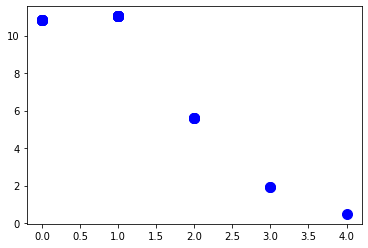

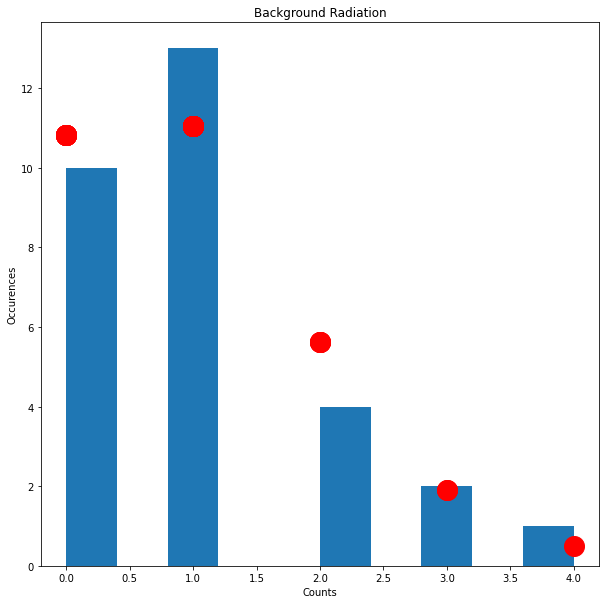

In [11]:
lam = 1.02
pmf = poisson.pmf(BackCount, lam)
plt.plot(BackCount, pmf*30, 'bo', ms=10)

plt.figure(figsize = (10,10))
plt.hist(BackCount)
plt.xlabel('Counts')
plt.ylabel('Occurences')
plt.plot(BackCount, pmf*30, 'bo', color = 'red', ms =20)
plt.title('Background Radiation')
plt.show()


To determine the average rate of the counts for the time interval of 5 seconds in counts per second we need to take the sum of the total counts in the total time and divide by the total time interval which is 30*5 seconds. Then to determine the error on the average count rate for the background radiation in the room is determined by using the square root rule for counting statistics to find the error on the total counts, and then using the error propagation rule for multiplying or dividing by constants we divide the error by the total time to get the average count rate and its uncertainty. This is done below. 

In [12]:
TotalBackground = sum(BackCount)
totalt = 30*5
AverageRate = TotalBackground/totalt
TotalBackgroundUncert = np.sqrt(TotalBackground)
AverageRateUnc = TotalBackgroundUncert/totalt

print(f'The average count rate for the background radiation in the room is {AverageRate:.3} +/- {AverageRateUnc:.3} counts/second.')

The average count rate for the background radiation in the room is 0.207 +/- 0.0371 counts/second.


The average count rate that we determined agrees strongly within uncertainties with the average count per time interval of 5 seconds and the standard deviation which we determined above. 

# 4.6 Gaussian Limit 

Now we set up a radioactive source 10cm away from the gieger counter and measured the count rate again. Below the data is plotted in a histogram and then we again compare the numpy standard deviation to the square root rule for counting stats method of finding the standard deviation.

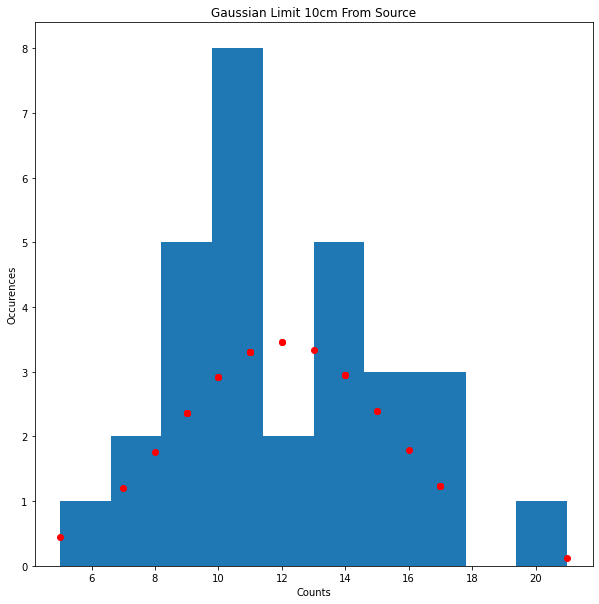

In [13]:
sc.norm.pdf(tencmcount, mean10cm, std10cm)


plt.figure(figsize = (10,10))
plt.hist(tencmcount)
plt.scatter(tencmcount, sc.norm.pdf(tencmcount, mean10cm, std10cm)*30, color = 'r')
plt.xlabel('Counts')
plt.ylabel("Occurences")
plt.title('Gaussian Limit 10cm From Source')
plt.show()

The lab asks us to consider how close to a gaussian this appears to be and just looking at it without examining standard deviations, or the mean which as expected is about 10 counts per interval it appears to be quite close to a gaussian centered at 10. Below we print both the square root rule standard deviations on the average counts per time interval. I overlayed a general gaussian just for visualization purposes, and it supports that there is a gaussian relationship, although it seems to have longer tails on the right hand side.

In [14]:
Table2 = [["Dataset", "Mean Counts", "Standard Deviation", "Square Root Rule"],
        ["Background", meanBack, stdBack, sqrtBack],
        ["10cm Away", mean10cm, std10cm, sqrt10cm],
        ["15cm Away",mean15cm, std15cm, sqrt15cm],
        ["20 cm Away", mean20cm, std20cm, sqrt20cm],
        ["25cm Away",mean25cm, std25cm, sqrt25cm],
        ["30cm Away",mean30cm, std30cm, sqrt30cm],
        ["35cm Away", mean35cm, std35cm, sqrt35cm],
        ["40cm Away", mean40cm, std40cm, sqrt40cm],]
print(tab(Table2))


----------  ------------------  ------------------  ------------------
Dataset     Mean Counts         Standard Deviation  Square Root Rule
Background  1.0333333333333334  1.015983376941878   1.0165300454651272
10cm Away   12.033333333333333  3.4591264150874217  3.468909530866052
15cm Away   5.333333333333333   2.440400695696417   2.309401076758503
20 cm Away  4.0                 2.2949219304078006  2.0
25cm Away   3.1                 1.556705923844749   1.760681686165901
30cm Away   2.533333333333333   1.4772346537440226  1.591644851508443
35cm Away   2.1                 1.3503086067019396  1.449137674618944
40cm Away   1.9666666666666666  1.1967548714010827  1.4023789311975086
----------  ------------------  ------------------  ------------------


Looking at how the square root rule connects to the standard deviation measured using the standard deviation formula it appears that the standard deviation begins to differ by increasingly large amounts as the distance increases from the source. We can say generally based off the data that the square root rule is. not a good estimate of the standard deviation in this dataset.

# 4.7 Inverse Square Law

First I needed to take the data from each of the distances find the average rate for all of them and then subtract the background rate determined in part 1 of the lab. To find the uncertainties in the rates I found the standard deviation of the total counts using the square root rule, and then dividing by the total time in order to propagate this error to find the error on the rate.

In [15]:
rate10cm = sum(tencmcount)/totalt
rate15cm = sum(fifteencmcount)/totalt
rate20cm = sum(twentycmcount)/totalt
rate25cm = sum(twentyfivecmcount)/totalt
rate30cm = sum(thirtycmcount)/totalt
rate35cm = sum(thirtyfivecmcount)/totalt
rate40cm = sum(fortycmcount)/totalt

error10cmrate = np.sqrt(sum(tencmcount))/totalt
error15cmrate = np.sqrt(sum(fifteencmcount))/totalt
error20cmrate = np.sqrt(sum(twentycmcount))/totalt
error25cmrate = np.sqrt(sum(twentyfivecmcount))/totalt
error30cmrate = np.sqrt(sum(thirtycmcount))/totalt
error35cmrate = np.sqrt(sum(thirtyfivecmcount))/totalt
error40cmrate = np.sqrt(sum(fortycmcount))/totalt

now to subtract the background rate:

and then to find the error post subtraction we need to add by quadrature

In [16]:
subrate10 = rate10cm - AverageRate 
subrate15 = rate15cm - AverageRate 
subrate20 = rate20cm - AverageRate 
subrate25 = rate25cm - AverageRate
subrate30 = rate30cm - AverageRate
subrate35 = rate35cm - AverageRate
subrate40 = rate40cm - AverageRate

subrateerror10cm = np.sqrt((error10cmrate)**2 + (AverageRateUnc)**2)
subrateerror15cm = np.sqrt((error15cmrate)**2 + (AverageRateUnc)**2)
subrateerror20cm = np.sqrt((error20cmrate)**2 + (AverageRateUnc)**2)
subrateerror25cm = np.sqrt((error25cmrate)**2 + (AverageRateUnc)**2)
subrateerror30cm = np.sqrt((error30cmrate)**2 + (AverageRateUnc)**2)
subrateerror35cm = np.sqrt((error35cmrate)**2 + (AverageRateUnc)**2)
subrateerror40cm = np.sqrt((error40cmrate)**2 + (AverageRateUnc)**2)

tableInversesq = [["Distance", "Rate (c/s)", "Unc (c/s)" ],
                  ["10cm", round(subrate10, 3), round(subrateerror10cm,3)],
                  ["15cm", round(subrate15, 3), round(subrateerror15cm,3)],
                  ["20cm", round(subrate20, 3), round(subrateerror20cm,3)],
                  ["25cm", round(subrate25, 3), round(subrateerror25cm,3)],
                  ["30cm", round(subrate30, 3), round(subrateerror30cm,3)],
                  ["35cm", round(subrate35, 3), round(subrateerror35cm,3)],
                  ["40cm", round(subrate40, 3), round(subrateerror40cm,3)]
                 ]
print(tab(tableInversesq))

--------  ----------  ---------
Distance  Rate (c/s)  Unc (c/s)
10cm      2.2         0.132
15cm      0.86        0.092
20cm      0.593       0.082
25cm      0.413       0.074
30cm      0.3         0.069
35cm      0.213       0.065
40cm      0.187       0.063
--------  ----------  ---------


Now that we have found the necessary rates to look at how radiation decreases as distance from the source increases, we need to linearize the dataset and fit a line to check. Linearizing the equation R = C/r^n, we get the form ln(R) = ln(C) - nln(r), this gives the linear form y = ln(R), b = (ln(C)), and m = ln(R), so to make a fit we need to plot the log of the distances against the logs of the Rates. This is done below, and we can find ln(C), and b from the fit if we dont restrict it to the origin. 

In [17]:
xdata = [np.log(10), np.log(15), np.log(20), np.log(25), np.log(30), np.log(35), np.log(40)]
ydata = [np.log(subrate10), np.log(subrate15), np.log(subrate20), np.log(subrate25), np.log(subrate30), np.log(subrate35), np.log(subrate40)]

nonlogx = np.array([10, 15, 20, 25, 30, 35, 40])
nonlogy = np.array([subrate10, subrate15, subrate20, subrate25, subrate30, subrate35, subrate40])


logerrory = [subrateerror10cm/subrate10, subrateerror15cm/subrate15,subrateerror20cm/subrate20, subrateerror25cm/subrate25, subrateerror30cm/subrate30, subrateerror35cm/subrate35, subrateerror40cm/subrate40]

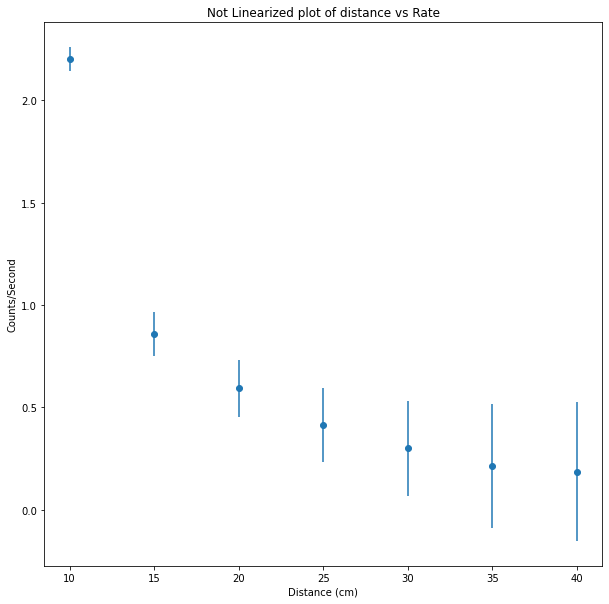

In [18]:
plt.figure(figsize= (10,10))
plt.scatter(nonlogx, nonlogy)
plt.xlabel("Distance (cm)")
plt.ylabel("Counts/Second")
plt.title("Not Linearized plot of distance vs Rate")
plt.errorbar(nonlogx, nonlogy,yerr = logerrory, ls = 'none')

residplotx = np.array([10 - xdata[0],15 - xdata[1],20 - xdata[2],25 - xdata[3],30 - xdata[4],35 - xdata[5],40 - xdata[6]])
residploty = np.array([subrate10 - ydata[0],subrate15 - ydata[1],subrate20 - ydata[2],subrate25 - ydata[3],subrate30 - ydata[4],subrate35 - ydata[5],subrate40 - ydata[6]])



Text(0, 0.5, 'Rate - LogRate c/s')

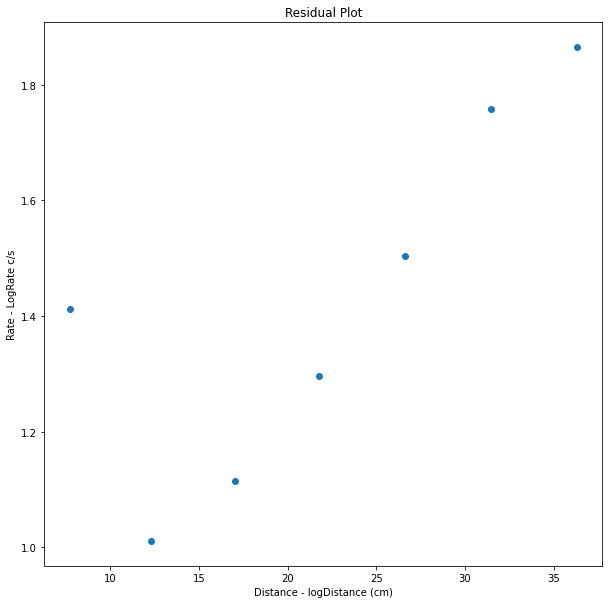

In [19]:
plt.figure(figsize = (10,10))
plt.scatter(residplotx, residploty)
plt.title("Residual Plot")
plt.xlabel("Distance - logDistance (cm)")
plt.ylabel("Rate - LogRate c/s")

The fit parameter n is -1.75 +/- 0.0679


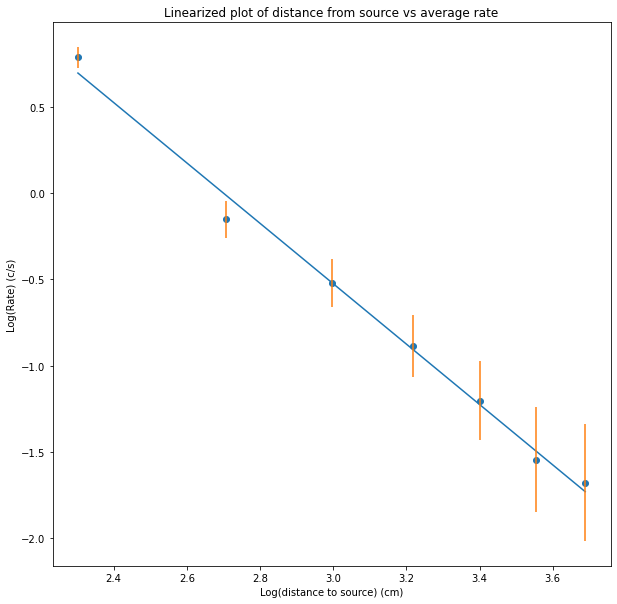

In [20]:
plt.figure(figsize = (10,10))
plt.scatter(xdata, ydata)
plt.xlabel("Log(distance to source) (cm)")
plt.ylabel("Log(Rate) (c/s)")
plt.title("Linearized plot of distance from source vs average rate")
n, lnC = np.polyfit(xdata, ydata, 1)
plt.plot(xdata, n* np.array(xdata) +lnC)
plt.errorbar(xdata, ydata, yerr = logerrory, ls = 'none')

coefficients, covariance = np.polyfit(xdata, ydata, 1, cov=True)

# Extract the uncertainty (standard deviation) of the coefficients
slope, intercept = coefficients
slope_uncertainty, intercept_uncertainty = np.sqrt(np.diag(covariance))



print(f"The fit parameter n is {n:.3} +/- {slope_uncertainty:.3}")

This plot showing a negative linear correlation bewteen distance and rate is what we expected to see based on the nonlinearized data. And looking at the fit paramaters we can see that our n value is 1.75 which is relatively close to what we expected from a inverse square relationship which would be n = 2 or I suppose in this case n = -2. The n value that we measured on 1.75 +/- .07 is not entirely in agreement with the expected value, however it is close, and attenuation in air is a possibility as we increase our distance from the source. On top of the potential attenuation due to air is the potential distance from the source being too close, so that the assumption made by the inverse square law of a point source is violated. At 10cm away, and perhaps 15cm and 20cm, its possible that the detector is receiving radiation in readings which are more consistent with those coming from a plane of radiation as opposed to a point. Thesse both could cause deviation from the expected relationship. Looking at the plot of the fit, it apeares to fit all points well, however the first two points seem to be the furthest away. This could be an example of the source being too close to the detector. Particularyl because when the residual plot was created, there is only one point which seems to violate the trend. But this could be the point which is throwing off the calculation of n.

# 4.8 Attentuation in Matter

To determine the attenuation of the radiation particles from the source at a distance of 10cm away we took the source and placed the geiger counter 10 cm away. We then folded a piece of tinfoil repeatedly to determine how to particles counted decreased with increasing thickness. In our case we started with a single layer of tinfoil and folded it in half over and over 6 times whihc gave us a geometric progression as suggested by the lab handout. We also observed at the last couple of folds a steep drop off in the counts/minute reading. Similar to the inverse square law we will use a similar relation to before -> R(l) = R0*e^(-l/lambda). R0 is the unattenuated rate which would be the measurement we took at a distance of 10cm in the inverse sqaure law portion of the lab, l is the amount of material/thickness, and we want to linearize the formula in a similar manner to extract the attenuation length which can be used to determine the type of radiation given off by the source.

layers of materials = 1, 2, 4, 8, 16, 32

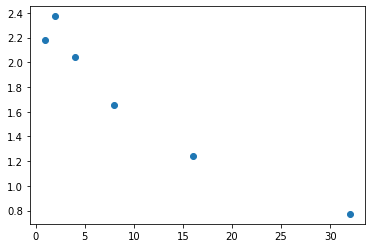

In [21]:
layers = [1, 2, 4, 8,16, 32]



Rate1fold = sum(onefoldcount)/totalt
Rate2fold = sum(twofoldcount)/totalt
Rate3fold = sum(threefoldcount)/totalt
Rate4fold = sum(fourfoldcount)/totalt
Rate5fold = sum(fivefoldcount)/totalt
Rate6fold = sum(sixfoldcount)/totalt
nonlinearattendata = [Rate1fold, Rate2fold,Rate3fold,Rate4fold,Rate5fold,Rate6fold]

plt.scatter(layers, nonlinearattendata)


Now in order to linearize we will need to take a log of the rates at each fold number, and then plot that vs the linear values for the number of layers of material. Then take a linear fit of the plot using numpy polyfit. The error bars on the linearized data will need to be found by using the rule for uncertainty in calcualtions using logs as we did above. A potential issue with the data we collected seems to be the second rate data point, which is at a higher rate than the initial measurement. This could be random from a mismeasurement of the layers, or possibly from the aluminum foil being more or less compressed. Perhaps the layers of air in between the aluminum could impact the measurments though this seems unlikely, as the source is still always the same distance away.

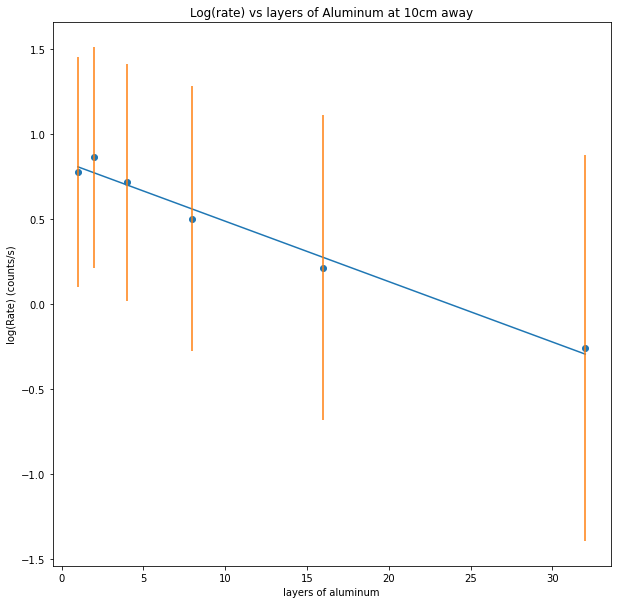

-0.03554487455051308


In [22]:
def logtaker(array):
    logdata = []
    for rate in array:
        lograte = np.log(rate)
        logdata.append(lograte)
    return np.array(logdata)

linearizedatten = logtaker(nonlinearattendata)

#Finding Errors on log rates
rateerror1fold = np.sqrt(sum(onefoldcount)/totalt)
rateerror2fold = np.sqrt(sum(twofoldcount)/totalt)
rateerror3fold = np.sqrt(sum(threefoldcount)/totalt)
rateerror4fold = np.sqrt(sum(fourfoldcount)/totalt)
rateerror5fold = np.sqrt(sum(fivefoldcount)/totalt)
rateerror6fold = np.sqrt(sum(sixfoldcount)/totalt)

logerrory = [rateerror1fold/Rate1fold, rateerror2fold/Rate2fold,rateerror3fold/Rate3fold, rateerror4fold/Rate4fold, rateerror5fold/Rate5fold, rateerror6fold/Rate6fold]
def layers_to_microns(array):
    thicknesses = []
    for layers in array:
        thickness = 28* layers
        thicknesses.append(thickness)
    return np.array(thicknesses)

thicknesses = layers_to_microns(layers)     

a,b = np.polyfit(layers, linearizedatten,1)
plt.figure(figsize = (10,10))
plt.scatter(layers, linearizedatten)
plt.plot(layers, a*np.array(layers)+b)
plt.errorbar(layers, linearizedatten, yerr = logerrory, ls = 'none')
plt.xlabel("layers of aluminum")
plt.ylabel("log(Rate) (counts/s)")
plt.title("Log(rate) vs layers of Aluminum at 10cm away")
plt.show()

print(a)

So now that we have linearized we can extract our estimate of the attenuation through matter, we know that the slope of our plot is the lnR/layers. Now we can convert the layers to thickness of material, which we measured to be roughly 28 microns +/- 2 microns. So at 28 microns per sheet we can use this conversion factor to figure out the thickness of material in microns. This is done below.  thickness/lnR = attenuation coefficient, so 1/ our slope is the lambda value. ln(rate) = -l/x    x = -l/ln(Rate). 1/a = x, so 1 over the slope of ther fit to our data gives the attenuation distance lambda. And to find the attentuation distance through aluminum we simply need to multiply the attenutation distance by the densit of aluminum. This is done below. 

In [23]:

lam = -1/a  
#lamincm = lam*(10**-6)
print(f'The attenuation length is {lam}')
densityalum = 2.7  #g/cm^2
alumatten = lam*densityalum
alumattencm = alumatten*(10**-3)
print(f'Attenuation length through aluminum is {alumattencm} g/cm^2')
 

The attenuation length is 28.133451380701676
Attenuation length through aluminum is 0.07596031872789454 g/cm^2


In [24]:
coefficients, covariance = np.polyfit(thicknesses, linearizedatten, 1, cov=True)

# Extract the uncertainty (standard deviation) of the coefficients
slope, intercept = coefficients
slope_uncertainty, intercept_uncertainty = np.sqrt(np.diag(covariance))

lamunc = 1/slope_uncertainty
lamuncfull = lamunc*(10**-6)
print(lamuncfull)
print(f'The attenuation length in the aluminum is measured to be {alumatten:.3} +/- {lamunc*(10**-3):.3} layers/log(counts/s).')
print(f'The mass attenuation length in the aluminum is measured to be {alumattencm:.3} +/- {lamuncfull:.3} g/cm^2.')

0.011202147922088502
The attenuation length in the aluminum is measured to be 76.0 +/- 11.2 layers/log(counts/s).
The mass attenuation length in the aluminum is measured to be 0.076 +/- 0.0112 g/cm^2.


###### We have now found our best estimate of the attenuation length in aluminum as well as the uncertianty. The way that I found uncertainty was through the covariance matrix, in other words by using python to bootstrap the error. 

Looking at our observed mass attenuation for the aluminum foil and the radiation from the source we can expect that the particles being emmitted are beta particles. While the source itself was labelled as an alpha source, this doesn't mean necessarily that the object doesnt also emit beta radiation adn perhaps due to attenuation through air of the alpha particles as well as the 10cm distance from the source even without aluminum foil it could be that the particles are not reaching the detector unless they are beta particles. As the lab states, often radiation sources emit multiple types of radiation and this could be what is being measured. There is also the possibility of systemic error due to beta particles in the air, and our experiment measuring radiation from a distance that alpha particles may not be able to trave.